<a href="https://colab.research.google.com/github/lesterw53679/MyFirstGit/blob/master/Copy_of_USGS_Daily_Streamflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Downlaod and Visualize Daily Streamflow Data from USGS Using Python**
## Developed by Dr. Mohsen Tahmasebi Nasab

## 1. Import Packages

In [ ]:
import urllib.parse
import urllib.request
import os
import pandas as pd
import numpy as np

## 2. Accessing USGS Daily Streamflow Data

### 2.1. Enter the required Info

In [ ]:
station_number = input("What is the USGS Station ID?\t")
start_date = input("Start Date (YYYY-MM-DD):\t")
end_date = input("End Date (YYYY-MM-DD):\t")
folder = os.getcwd()

What is the USGS Station ID?	05289800
Start Date (YYYY-MM-DD):	2015-5-01
End Date (YYYY-MM-DD):	2022-05-12


### 2.2. Create a inique URL

In [ ]:
section1 = 'https://nwis.waterdata.usgs.gov/nwis/dv?referred_module=sw&search_site_no='
section2 = '&search_site_no_match_type=exact&site_tp_cd=OC&site_tp_cd=OC-CO&site_tp_cd=ES&site_tp_cd='\
'LK&site_tp_cd=ST&site_tp_cd=ST-CA&site_tp_cd=ST-DCH&site_tp_cd=ST-TS&index_pmcode_00060=1&group_key='\
'NONE&sitefile_output_format=html_table&column_name=agency_cd&column_name=site_no&column_name=station_nm&range_selection=date_range&begin_date='
section3 = '&end_date='
section4 = '&format=rdb&date_format=YYYY-MM-DD&rdb_compression=value&list_of_search_criteria=search_site_no%2Csite_tp_cd%2Crealtime_parameter_selection'

link = (section1 + station_number + section2 + start_date + section3 + end_date + section4)
print("Click here to see the generated USGS link: \n",link)

Click here to see the generated USGS link: 
 https://nwis.waterdata.usgs.gov/nwis/dv?referred_module=sw&search_site_no=05289800&search_site_no_match_type=exact&site_tp_cd=OC&site_tp_cd=OC-CO&site_tp_cd=ES&site_tp_cd=LK&site_tp_cd=ST&site_tp_cd=ST-CA&site_tp_cd=ST-DCH&site_tp_cd=ST-TS&index_pmcode_00060=1&group_key=NONE&sitefile_output_format=html_table&column_name=agency_cd&column_name=site_no&column_name=station_nm&range_selection=date_range&begin_date=2015-5-01&end_date=2022-05-12&format=rdb&date_format=YYYY-MM-DD&rdb_compression=value&list_of_search_criteria=search_site_no%2Csite_tp_cd%2Crealtime_parameter_selection


### 2.3. Download and process daily streamflow

In [ ]:
USGS_page = urllib.request.urlopen(link)
downloaded_data = USGS_page.read()

In [ ]:
type(downloaded_data)

bytes

In [ ]:
str_data = downloaded_data.decode()
type(str_data)
str_data

"# ---------------------------------- WARNING ----------------------------------------\n# Some of the data that you have obtained from this U.S. Geological Survey database\n# may not have received Director's approval. Any such data values are qualified\n# as provisional and are subject to revision. Provisional data are released on the\n# condition that neither the USGS nor the United States Government may be held liable\n# for any damages resulting from its use.\n#\n# Additional info: https://help.waterdata.usgs.gov/policies/provisional-data-statement\n#\n# File-format description:  https://help.waterdata.usgs.gov/faq/about-tab-delimited-output\n# Automated-retrieval info: https://help.waterdata.usgs.gov/faq/automated-retrievals\n#\n# Contact:   gs-w_support_nwisweb@usgs.gov\n# retrieved: 2022-05-13 12:32:32 EDT       (nadww01)\n#\n# Data for the following 1 site(s) are contained in this file\n#    USGS 05289800 MINNEHAHA CREEK AT HIAWATHA AVE. IN MINNEAPOLIS,MN\n# --------------------

In [ ]:
f_str_data = str_data.split('\n')
#f_str_data

In [ ]:
station_name = ''

for line in range(len(f_str_data)):
    if f_str_data[line].startswith("#    USGS"):
        station_name=f_str_data[line][3:]
print(station_name)

  USGS 05289800 MINNEHAHA CREEK AT HIAWATHA AVE. IN MINNEAPOLIS,MN


In [ ]:
date_flow = ''

for line in range(len(f_str_data)):
    if f_str_data[line].startswith("USGS"):
        data = f_str_data[line][14:]
        columns = data.split('\t')
        rows = ','.join([columns[0],(columns[1])])
        date_flow += rows + '\n'
date_flow = date_flow.encode()

with open(folder+'/USGS_Data_for_' + station_number  + '.txt', 'wb') as text:
        text.write(date_flow)

In [ ]:
filename = folder+'/USGS_Data_for_' + station_number  + '.txt'
columns = ['Date','Discharge (cfs)']
df = pd.read_csv(filename,header=None,names=columns,parse_dates=[0])
df=df.set_index(['Date'])
df['Discharge (cfs)']=pd.to_numeric(df['Discharge (cfs)'], errors='coerce')
df.tail()

,Discharge (cfs)
Date,
2022-05-04,63.2
2022-05-05,56.3
2022-05-06,48.9
2022-05-07,44.4
2022-05-08,42.7


### 2.4. Create hydrograph

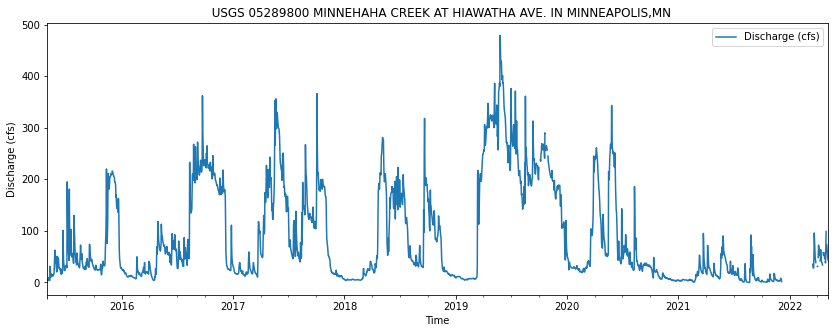

In [ ]:
df.plot(figsize=(14,5), title= station_name, xlabel="Time", ylabel="Discharge (cfs)");